## IMPORTING NECESSARY LIBRARIES



In [68]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context='notebook', style='white', palette='colorblind')

#### MODELS ####

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from sklearn.model_selection import  GridSearchCV, learning_curve, cross_val_score

## LOADING DATA

In [176]:
original_df = pd.read_csv('Cancer.csv')
df = pd.read_csv('Cancer.csv')
df.drop(["Unnamed: 32"],axis=1,inplace = True)
original_df.drop(["Unnamed: 32"],axis=1,inplace = True)
print(f'original_df:{original_df.shape}\ndf:{df.shape}')

original_df:(569, 32)
df:(569, 32)


## CLEANING DATA

In [177]:
def pd_df_non_numeric_to_numeric(df):  # function which converts string to int or float
    for column in df.columns:
        if type(df[column].values[0]) != np.int64 and type(df[column].values[0]) != np.float64:
            xformlist = dict()
            for item, value in enumerate(df[column].unique()):
                xformlist[value]=item
            df[column] = (df[column].apply(lambda x: xformlist[x]))
    return df
df = pd_df_non_numeric_to_numeric(df) # class: 0 is B and class: 1 is M

In [174]:
df.sample(3) # Randomly display 3 rows 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
348,898690,1,11.47,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,...,12.51,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763
465,9113239,1,13.24,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.02833,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.65560,0.13570,0.2845,0.12490
233,88206102,0,20.51,27.81,134.40,1319.0,0.09159,0.10740,0.15540,0.08340,...,24.47,37.38,162.70,1872.0,0.1223,0.2761,0.41460,0.15630,0.2437,0.08328


In [121]:
df.info()  # Checking for NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

there are no null values found

In [122]:
df.describe()  # overview of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Feature analysis

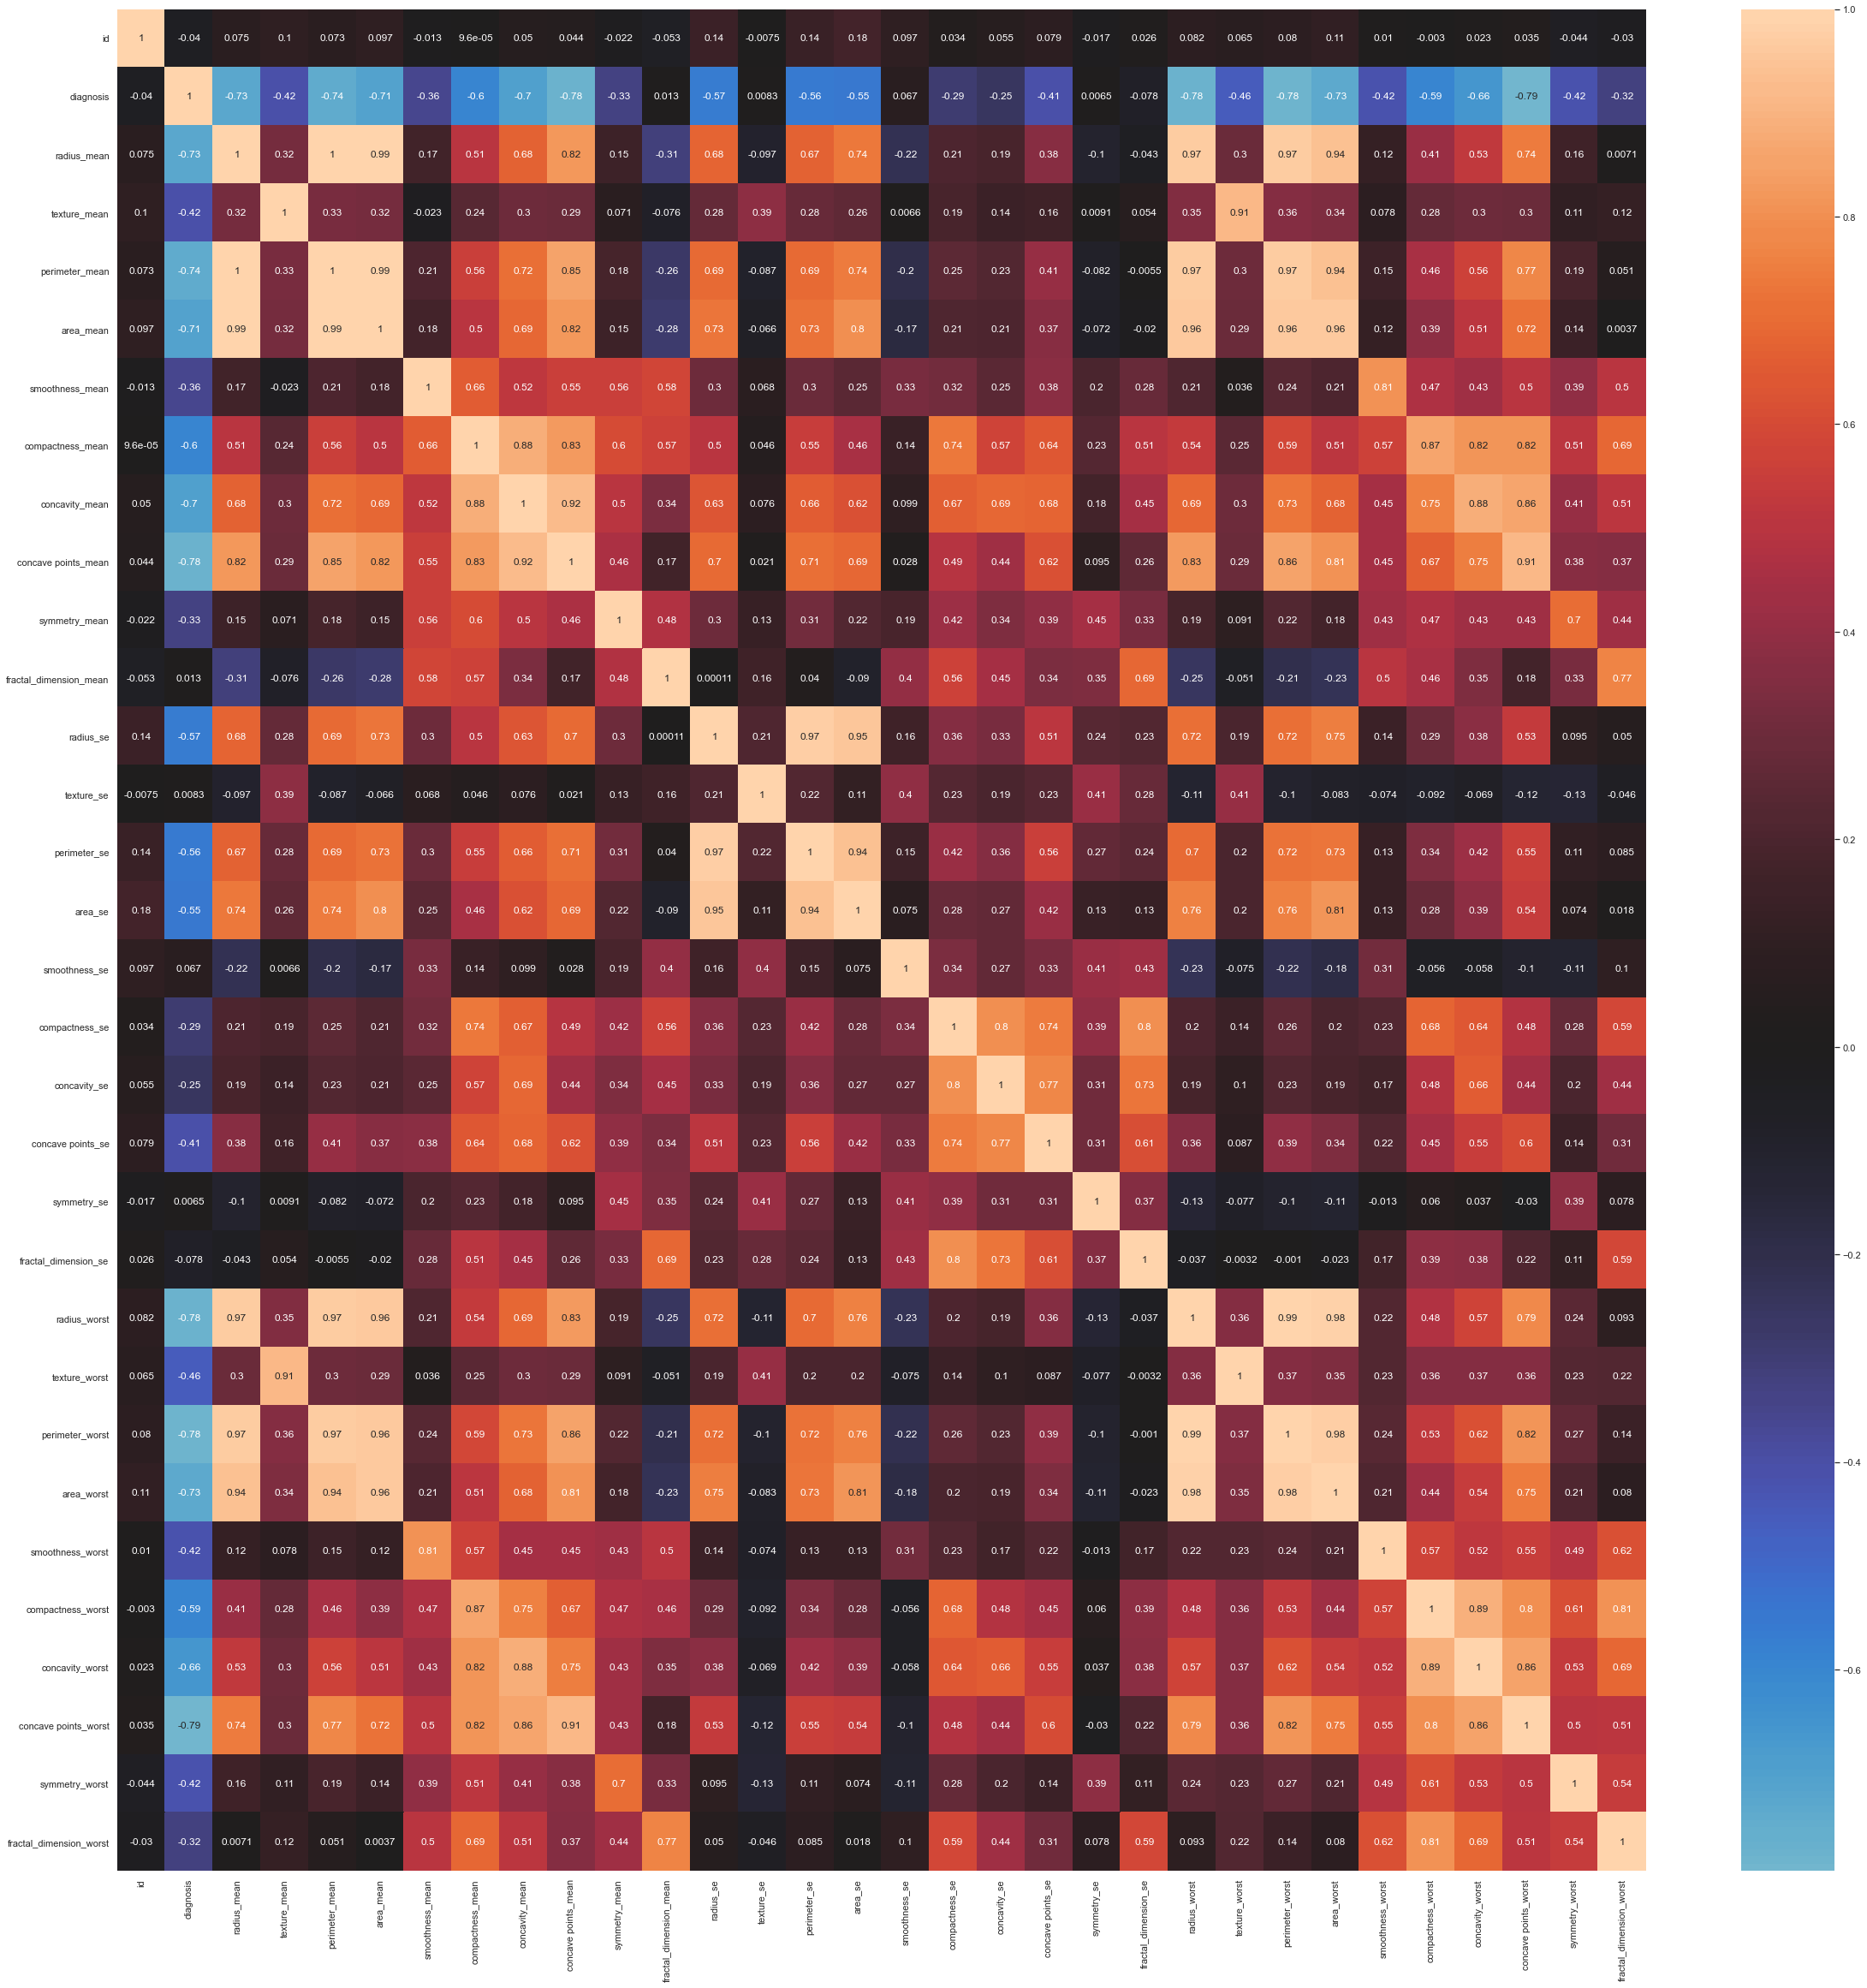

In [9]:
# correlation between features
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot=True, center=0)
plt.show()

There are many features which are heighly correlated. Reducing the features will prevrnt from over fitting the data and saves the training time. The features which are independent are kept and which are heighly correlated are removed.

## Feature selection

finding the correlated features by plotting the scatter plot.

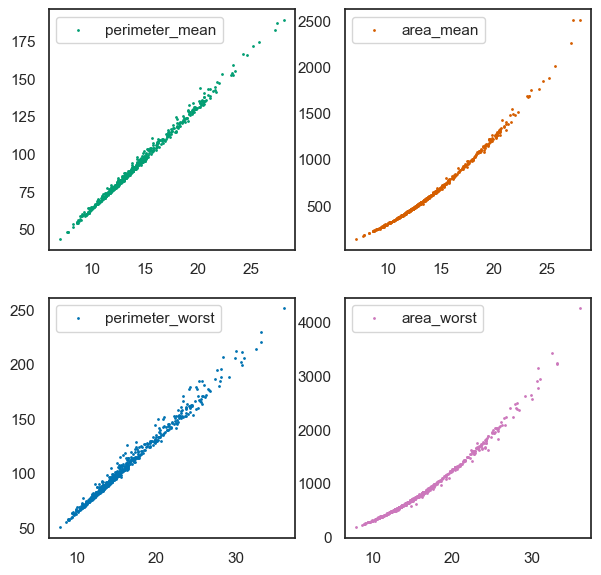

In [72]:
fig=plt.figure(figsize=[7, 7],dpi=100)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.scatter(df["radius_mean"],df["perimeter_mean"],color = 'g',label='perimeter_mean',marker=None,s=1)
ax1.legend()
ax2.scatter(df["radius_mean"],df["area_mean"],label='area_mean',color = 'r',marker=None,s=1)
ax2.legend()
ax3.scatter(df["radius_worst"],df["perimeter_worst"],label='perimeter_worst',color = 'b',marker=None,s=1)
ax3.legend()
ax4.scatter(df["radius_worst"],df["area_worst"],label='area_worst',color = 'm',marker=None,s=1)
ax4.legend()

plt.show()

The features perimeter_mean, area_mean are heighly correlated with radius_mean.
The features perimeter_worst, area_worst are heighly correlated with radius_worst.

so perimeter_mean, area_mean ,perimeter_worst, area_worst will be DROPED

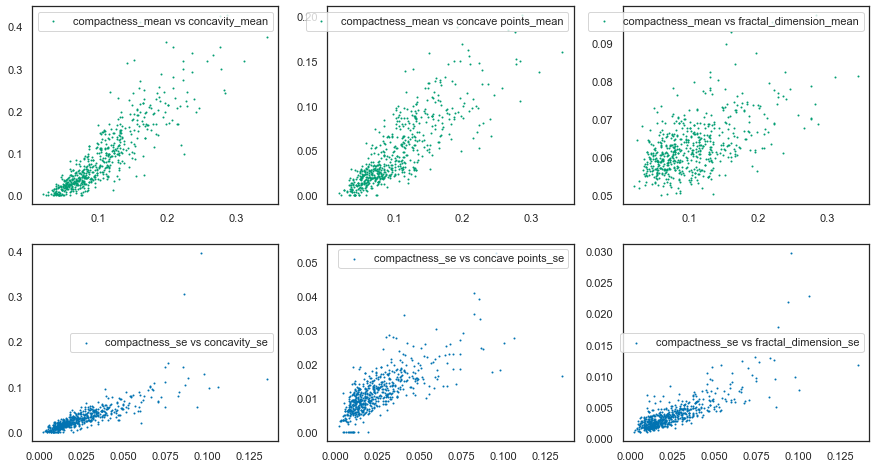

In [73]:
fig=plt.figure(figsize=[15, 8])

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)


ax1.scatter(df["compactness_mean"],df["concavity_mean"],color = 'g',label='compactness_mean vs concavity_mean',marker=None,s=1)
ax1.legend()
ax2.scatter(df["compactness_mean"],df["concave points_mean"],label='compactness_mean vs concave points_mean',color = 'g',marker=None,s=1)
ax2.legend()
ax3.scatter(df["compactness_mean"],df["fractal_dimension_mean"],label='compactness_mean vs fractal_dimension_mean',color = 'g',marker=None,s=1)
ax3.legend()
ax4.scatter(df["compactness_se"],df["concavity_se"],label='compactness_se vs concavity_se',color = 'b',marker=None,s=1)
ax4.legend()
ax5.scatter(df["compactness_se"],df["concave points_se"],label='compactness_se vs concave points_se',color = 'b',marker=None,s=1)
ax5.legend()
ax6.scatter(df["compactness_se"],df["fractal_dimension_se"],label='compactness_se vs fractal_dimension_se',color = 'b',marker=None,s=1)
ax6.legend()

plt.show()

The features concavity_mean, concave points_mean, fractal_dimension_mean are heighly correlated with compactness_mean.
The features concavity_se, concave points_se, fractal_dimension_se are heighly correlated with compactness_se.

so concavity_mean, concave points_mean, fractal_dimension_mean, concavity_se, concave points_se, fractal_dimension_se will be DROPED

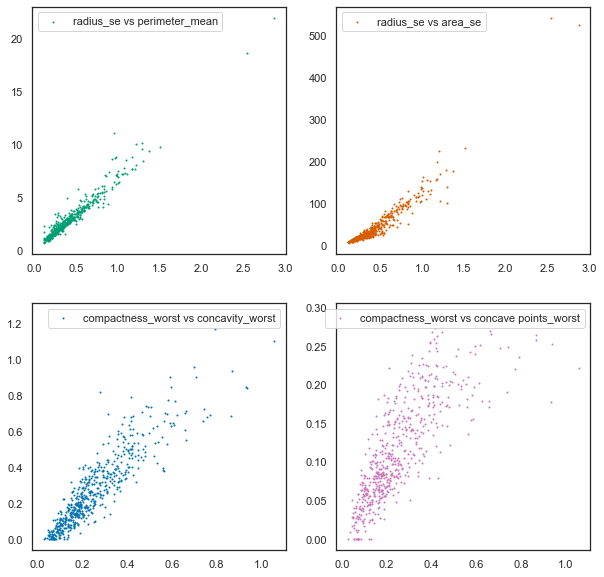

In [74]:
fig=plt.figure(figsize=[10, 10])

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.scatter(df["radius_se"],df["perimeter_se"],color = 'g',label='radius_se vs perimeter_mean',marker=None,s=1)
ax1.legend()
ax2.scatter(df["radius_se"],df["area_se"],label='radius_se vs area_se',color = 'r',marker=None,s=1)
ax2.legend()
ax3.scatter(df["compactness_worst"],df["concavity_worst"],label='compactness_worst vs concavity_worst',color = 'b',marker=None,s=1)
ax3.legend()
ax4.scatter(df["compactness_worst"],df["concave points_worst"],label='compactness_worst vs concave points_worst',color = 'm',marker=None,s=1)
ax4.legend()

plt.show()

The features perimeter_se, area_se are heighly correlated with radius_se.
The features concavity_worst, concave points_worst are heighly correlated with compactness_worst.

so concavity_worst, concave points_worst ,perimeter_se, area_se will be DROPED

In [179]:
df = df[["radius_se","texture_se","smoothness_se","compactness_se","symmetry_se","radius_worst",
         "texture_worst","smoothness_worst","compactness_worst","symmetry_worst","radius_mean",
         "texture_mean","smoothness_mean","compactness_mean","symmetry_mean","diagnosis"]]

created a data set with all indepent features

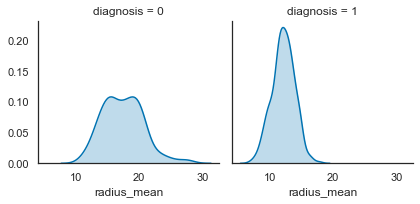

In [76]:

sns.FacetGrid(df, col='diagnosis').map(sns.distplot, 'radius_mean', hist=False, kde=True, rug=False, kde_kws={'shade':True})
plt.show()


we can observe that majority with mean radius 10 - 20 are class B and 5 - 15 are class M 

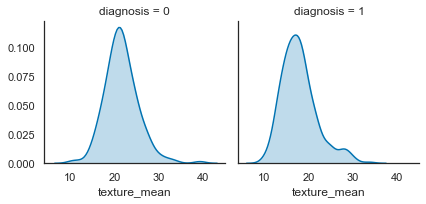

In [77]:

sns.FacetGrid(df, col='diagnosis').map(sns.distplot, 'texture_mean', hist=False, kde=True, rug=False, kde_kws={'shade':True})
plt.show()


majority with texture mean less than 20 are class M and greater than 20 are class B

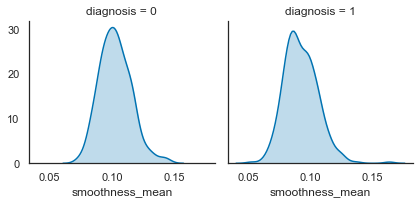

In [78]:

sns.FacetGrid(df, col='diagnosis').map(sns.distplot, 'smoothness_mean', hist=False, kde=True, rug=False, kde_kws={'shade':True})
plt.show()


majority with mean smoothness less than 0.10 are class M and greater than 0.10 are class B

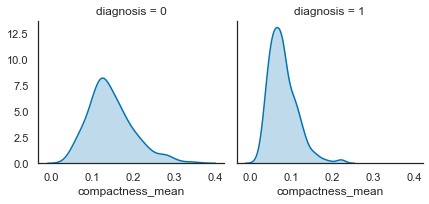

In [79]:

sns.FacetGrid(df, col='diagnosis').map(sns.distplot,'compactness_mean', hist=False, kde=True, rug=False, kde_kws={'shade':True})
plt.show()


majority with mean compactness less than 0.10 are class M and greater than 0.10 are class B

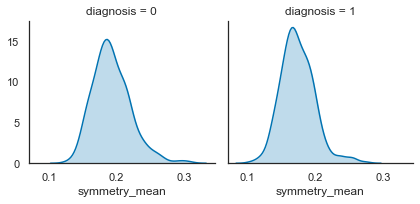

In [80]:

sns.FacetGrid(df, col='diagnosis').map(sns.distplot, 'symmetry_mean', hist=False, kde=True, rug=False, kde_kws={'shade':True})
plt.show()


majority with mean symmetry less than 0.20 are class M and greater than 0.20 are class B

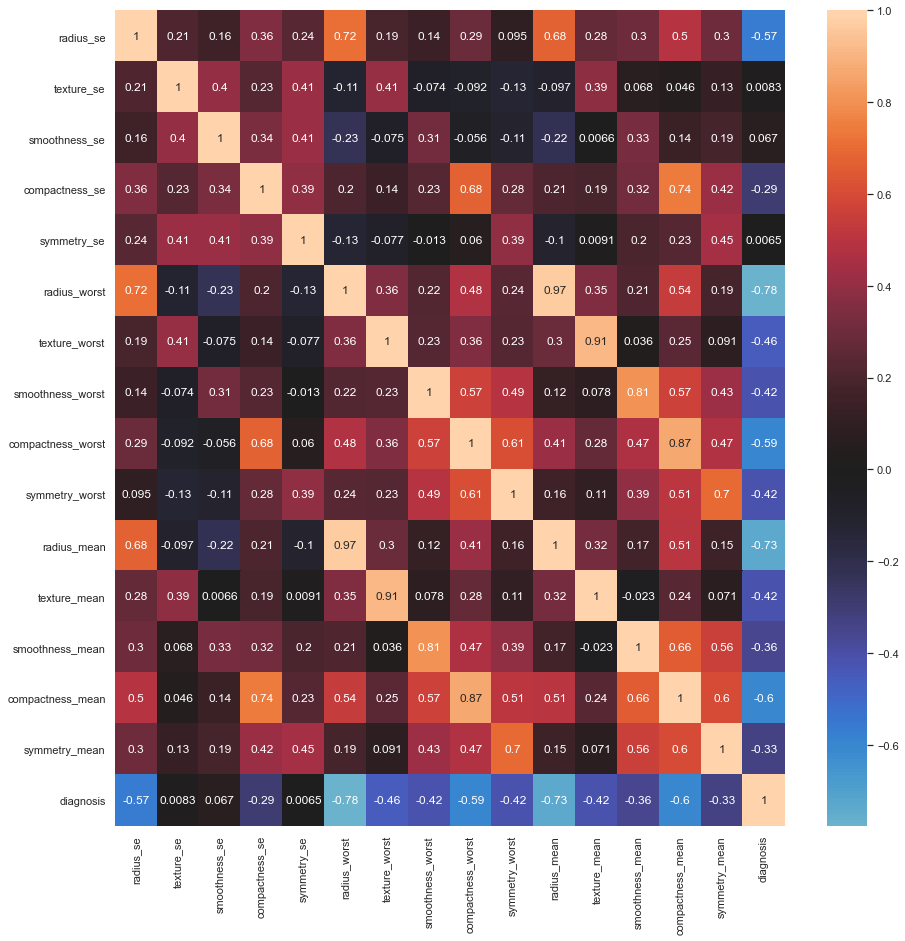

In [81]:
# correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, center=0)
plt.show()

#### Now all the features are independent and not much correlated

In [126]:
df.info() # final ckech through all the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius_se          569 non-null    float64
 1   texture_se         569 non-null    float64
 2   smoothness_se      569 non-null    float64
 3   compactness_se     569 non-null    float64
 4   symmetry_se        569 non-null    float64
 5   radius_worst       569 non-null    float64
 6   texture_worst      569 non-null    float64
 7   smoothness_worst   569 non-null    float64
 8   compactness_worst  569 non-null    float64
 9   symmetry_worst     569 non-null    float64
 10  radius_mean        569 non-null    float64
 11  texture_mean       569 non-null    float64
 12  smoothness_mean    569 non-null    float64
 13  compactness_mean   569 non-null    float64
 14  symmetry_mean      569 non-null    float64
 15  diagnosis          569 non-null    int64  
dtypes: float64(15), int64(1)
m

In [180]:
df.sample(3) 

,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,diagnosis
356,0.3106,1.5100,0.007807,0.03932,0.02860,14.19,24.85,0.1343,0.2658,0.3113,13.05,18.59,0.10820,0.13040,0.2035,1
513,0.4165,0.6237,0.004953,0.01812,0.01539,16.76,17.24,0.1223,0.1928,0.2626,14.58,13.66,0.09832,0.08918,0.1739,1
184,0.2054,0.4956,0.003290,0.01395,0.01172,17.80,28.03,0.1301,0.3299,0.3175,15.28,22.41,0.09057,0.10520,0.1727,0


## Splitting data set into Train and Test Sets

In [144]:
X = df.drop("diagnosis",axis = 1)
y = df['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2) # 80% training set and 20% test set. 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 15) (114, 15) (455,) (114,)


In [145]:
#### Scaling all the features ####

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training

* XGBoost
* SVM
* RandomForest
* k nearest neighbour 
* Logistic regression

## XGBoost

In [146]:
XGB = xgboost.XGBClassifier()

## Hyper Parameter Optimization

param_xgb={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ n for n in range(1, 9) ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

rs_xgb = RandomizedSearchCV(XGB,param_distributions=param_xgb,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

rs_xgb.fit(X_train, y_train)

XGB = rs_xgb.best_estimator_
rs_xgb.best_estimator_

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.4s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
print(f'XGB GridSearch best params: {rs_xgb.best_params_}')
print()
print(f'XGB GridSearch best score: {rs_xgb.best_score_}')

XGB GridSearch best params: {'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.7}

XGB GridSearch best score: 0.9913485221674877


## SVM

In [148]:
SVM = SVC()

## Hyper Parameter Optimization

param_svm={
 "C"    : [1.0, 10.0, 100.0, 1000.0 ] ,
 "degree"        : [ 2,3, 4, 5 ],
 "decision_function_shape" : [ 'ovr','linear' ],
 "gamma"            : [  0.1, 0.2 , 0.3, 0.4 ,0.5, 0.6, 0.7, 'scale' ],  
}

rs_svm = RandomizedSearchCV(SVM,param_distributions=param_svm,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

rs_svm.fit(X_train, y_train)

SVM = rs_svm.best_estimator_
rs_svm.best_estimator_

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='linear', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [149]:
print(f'SVM RandomizedSearchCV best params: {rs_svm.best_params_}')
print()
print(f'SVM RandomizedSearchCV best score: {rs_svm.best_score_}')

SVM RandomizedSearchCV best params: {'gamma': 'scale', 'degree': 2, 'decision_function_shape': 'linear', 'C': 10.0}

SVM RandomizedSearchCV best score: 0.9909446537235583


## RandomForest

In [150]:
RFC = RandomForestClassifier()

param_rfc = {"max_depth": [None],
              "max_features": [3,"sqrt", "log2"],
              "min_samples_split": [n for n in range(1, 9)],
              "min_samples_leaf": [n for n in range(1, 9)],
              "n_estimators" :[10,100,200, 500],
              "criterion": ["gini", "entropy"],
            }

rf_rfc = RandomizedSearchCV(RFC,param_distributions=param_rfc,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

rf_rfc.fit(X_train, y_train)

rfc_best_estimator = rf_rfc.best_estimator_

RFC = rf_rfc.best_estimator_
RFC.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
print(f'RFC RandomizedSearchCV best params: {rf_rfc.best_params_}')
print()
print(f'RFC RandomizedSearchCV best score: {rf_rfc.best_score_}')

RFC RandomizedSearchCV best params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}

RFC RandomizedSearchCV best score: 0.9925021732831063


# k nearest neighbour

In [152]:
KNN = KNeighborsClassifier()

param_knn = {
    'n_neighbors': [2,3,4,5,6,7,8,9,10,15, 20],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'], 
    'leaf_size': [10, 20, 25, 30, 35, 40], 
             }

rf_knn = RandomizedSearchCV(KNN,param_distributions=param_knn,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

rf_knn.fit(X_train, y_train)

knn_best_estimator = rf_knn.best_estimator_

KNN = rf_knn.best_estimator_
KNN.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

In [153]:
print(f'KNN RandomizedSearchCV best params: {rf_knn.best_params_}')
print()
print(f'KNN RandomizedSearchCV best score: {rf_knn.best_score_}')

KNN RandomizedSearchCV best params: {'weights': 'distance', 'n_neighbors': 20, 'leaf_size': 10, 'algorithm': 'kd_tree'}

KNN RandomizedSearchCV best score: 0.9876593740944652


## Logistic regression

In [163]:
LR = LogisticRegression()

param_lr = {'C': [1, 10, 100, 200],                 
            'penalty': ['l1','l2','elasticnet'], 
           'fit_intercept':[True,False],
            'class_weight': [{0: 1.6839622641509433, 1: 1}],
           'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

rf_lr = RandomizedSearchCV(LR,param_distributions=param_lr,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

rf_lr.fit(X_train, y_train)

lr_best_estimator = rf_lr.best_estimator_

LR = rf_lr.best_estimator_
LR.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished


LogisticRegression(C=1, class_weight={0: 1.6839622641509433, 1: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
print(f'LR RandomizedSearchCV best params: {rf_lr.best_params_}')
print()
print(f'LR RandomizedSearchCV best score: {rf_lr.best_score_}')

LR RandomizedSearchCV best params: {'solver': 'liblinear', 'penalty': 'l1', 'fit_intercept': True, 'class_weight': {0: 1.6839622641509433, 1: 1}, 'C': 1}

LR RandomizedSearchCV best score: 0.9952839756592292


## Model Comparison

In [165]:
def CVScore(classifiers):
    
    cv_score = []
    names = []
    
    for n_classifier in range(len(classifiers)):
        name = classifiers[n_classifier][0]
        model = classifiers[n_classifier][1]
        cv_score.append(cross_val_score(model, X_train, y_train, scoring = "roc_auc", cv = 10, n_jobs=4))
        names.append(name)
        
    cv_means = []
    
    for cv_result in cv_score:
        cv_means.append(cv_result.mean())
        
    cv_res = pd.DataFrame({"Model":names,"CVMeans":cv_means})
    cv_res=cv_res.sort_values("CVMeans", axis = 0, ascending = False, inplace = False).reset_index(drop=True)
    print('\n-------------------------CrossVal Training scores-------------------------\n\n', cv_res)

clf_list = [ ("XGB", XGB), ("SVC",SVM) ,("RandomForest", RFC) , ("KNN", KNN),("LogisticRegression",LR)]

CVScore(clf_list)


-------------------------CrossVal Training scores-------------------------

                 Model   CVMeans
0  LogisticRegression  0.995284
1                 XGB  0.991349
2                 SVC  0.990945
3        RandomForest  0.988934
4                 KNN  0.987659


#### performance on test set

In [167]:
classifiers = [XGB,SVM,RFC,KNN,LR]

for classifier in classifiers:   
    y_pred= classifier.predict(X_test)
    print("classifier =>",classifier)
    print()
    print("Accuracy score :",accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('========================================================')

classifier => XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy score : 0.9473684210526315
[[42  3]
 [ 3 66]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        45
           1       0.96      0.96      0.96        69

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95    

### =========================================================================================
# BEST MODEL IS KNeighborsClassifier with accuracy 95.61%
### =========================================================================================

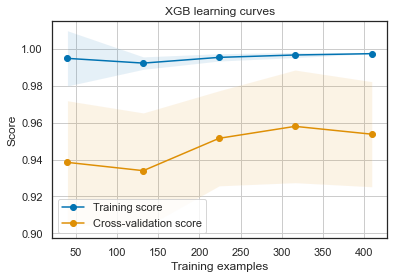

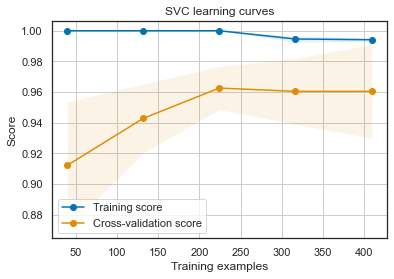

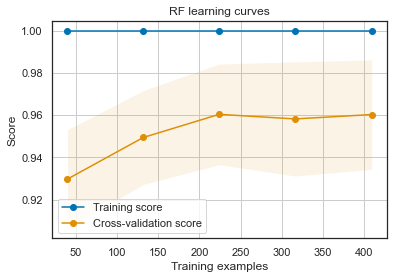

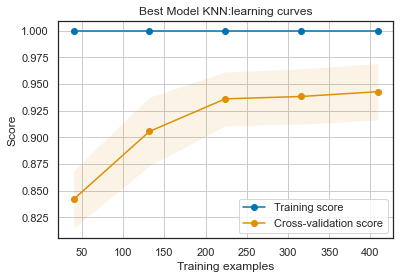

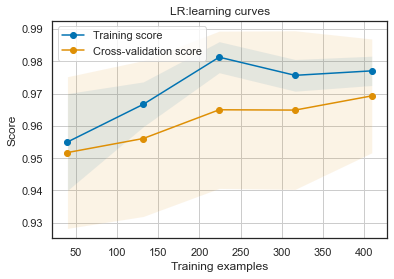

In [181]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)

    plt.plot(train_sizes, train_scores_mean, 'o-',
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-',
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
plot_learning_curve(XGB,"XGB learning curves", X_train, y_train, cv=10)
plot_learning_curve(SVM,"SVC learning curves", X_train, y_train, cv=10)
plot_learning_curve(RFC,"RF learning curves", X_train, y_train, cv=10)
plot_learning_curve(KNN,"Best Model KNN:learning curves", X_train, y_train, cv=10)
plot_learning_curve(LR,"LR:learning curves", X_train, y_train, cv=10)